In [1]:
import tensorflow as tf
import numpy as np
import utils
from models import Model
import imp
from gensim.models import KeyedVectors

In [2]:
dataset = utils.load_data(keywords=['technology', 'design', 'entertainment'])

In [3]:
wordvectors = KeyedVectors.load_word2vec_format('../embeddings/vecs_50.vec')

In [4]:
vectorizer = utils.DocVectorizer(mean=False, keys=wordvectors)

In [5]:
X, y = list(zip(*dataset))
y, labels_readable = utils.transform_labels_usable(y)

In [6]:
vx, vy = vectorizer.fit_transform(X, y)

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
x_train, x_test, y_train, y_test = train_test_split(vx, vy)

In [9]:
len(x_test[0])

2444

In [11]:
utils.divide_into_chunks(x_train[0], 100).shape

(16, 50)

In [12]:
with open('ted_talks_eng.txt', 'r') as f:
    T = f.read().split('\n')

In [13]:
sentences_numbers = list(map(len, map(lambda x: [s for s in x.split('.') if len(s)], T)))

In [14]:
import matplotlib.pyplot as plt

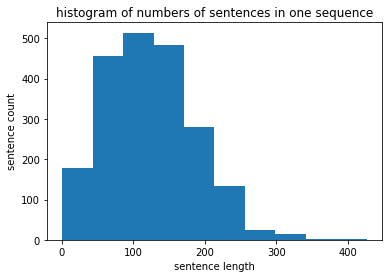

In [15]:
plt.hist(sentences_numbers)
plt.title('histogram of numbers of sentences in one sequence')
plt.xlabel('sentence length')
plt.ylabel('sentence count')
plt.show()

In [16]:
sx = list(map(lambda x: utils.divide_into_sentences(x, wordvectors), T))

In [17]:
x_train, x_test, y_train, y_test = train_test_split(np.asarray(sx)[np.where(list(map(lambda x: x.shape[0], sx)))[0]], np.asarray(y)[np.where(list(map(lambda x: x.shape[0], sx)))[0]])

In [18]:
import models

In [19]:
imp.reload(models)

<module 'models' from '/home/lukasz/Dokumenty/DEEP LEARNING/NLP/oxford/models.py'>

In [20]:
from models import Model

In [21]:
rnn = Model('rnn', hidden=75, bidirectional=True, class_balance=False, alpha=1e-1, average=True, x_test=x_test, y_test=y_test)


In [22]:
rnn.fit(x_train, y_train)

{'output_size': 8, 'bidirectional': True, 'input_size': 50, 'hidden': 75, 'average': True}
Tensor("truediv:0", shape=(?, 150), dtype=float32)
start training 1000 left
1000 left, train 19.97353172302246, test 27.38390350341797
990 left, train 12.169129371643066, test 13.533239364624023
980 left, train 4.907505035400391, test 6.922303676605225
970 left, train 2.931694507598877, test 4.669524192810059
960 left, train 2.230128526687622, test 3.769963026046753
950 left, train 1.809136986732483, test 3.570756435394287
940 left, train 1.710263967514038, test 3.3756637573242188
930 left, train 1.7211925983428955, test 3.5098438262939453
920 left, train 1.670579195022583, test 3.3553993701934814
910 left, train 1.6555745601654053, test 3.4247589111328125
900 left, train 1.649696707725525, test 3.362241744995117
890 left, train 1.6553561687469482, test 3.5329532623291016
880 left, train 1.7182528972625732, test 3.4354214668273926
870 left, train 1.6840893030166626, test 3.4667019844055176
860 le

KeyboardInterrupt: 

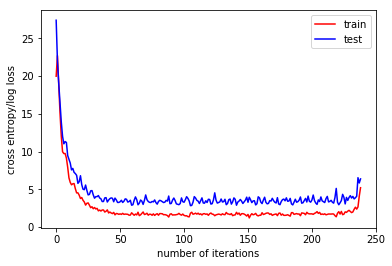

In [23]:
N = len(rnn.train_loss)
plt.plot(rnn.train_loss, c='red', label='train')
plt.plot(rnn.test_loss, c='blue', label='test')
plt.xlabel('number of iterations')
plt.ylabel('cross entropy/log loss')
plt.legend(loc='best')
plt.show()

In [33]:
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit

In [37]:
from gensim.models import KeyedVectors

big_model = KeyedVectors.load_word2vec_format('../embeddings/vecs_300.vec')

In [ ]:
nn = models.Model('mlp', lr=1e-3, class_balance=False, batch=256, iters=300, alpha=1e-3, 
                  architecture=[500], dropout=1)